## r2 Yöntemi Örneği

### Kütüphanelerin yüklenmesi

In [1]:
# Kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression # Doğrusal
from sklearn.preprocessing import PolynomialFeatures # polinomsal
from sklearn.metrics import r2_score

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

### Verilerin Okunması

In [2]:
# veriyi oku
df = pd.read_csv("/DATA/datasets/dogrusal_regresyon_veriseti.csv", sep = ";")
df.head()

deneyim  maas
0      0.5  2500
1      0.0  2250
2      1.0  2750
3      5.0  8000
4      8.0  9000

### Verilerin Görselleştirilmesi

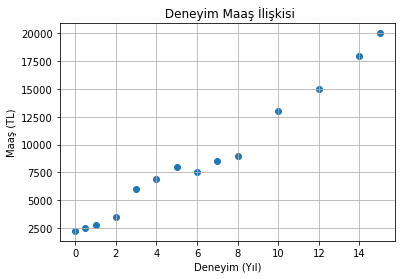

In [3]:
# veriyi görselleştirelim
plt.scatter(df.deneyim, df.maas)
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title(" Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

### Modelin Eğitilmesi (Doğrusal Regresyon)

In [4]:
# Doğrusal Regresyon Modeli Eğitimi 
linear_reg = LinearRegression()

# maas ve deneyim sütunlarını numpy array yapalım.
x = df.deneyim.values.reshape(-1, 1)
y = df.maas.values.reshape(-1, 1)

# doğrusal regresyon eğitimi
linear_reg.fit(x, y)

LinearRegression()

### Modelin Eğitilmesi (Polinomal Regresyon)

In [5]:
# polinomsal regresyon modeli eğitelim
polinom_regresyon = PolynomialFeatures(degree = 2) # polynom derecesi
x_polinom = polinom_regresyon.fit_transform(x)
poly_reg = LinearRegression()
poly_reg.fit(x_polinom, y)

LinearRegression()

### Tahmin ve Görselleştirme

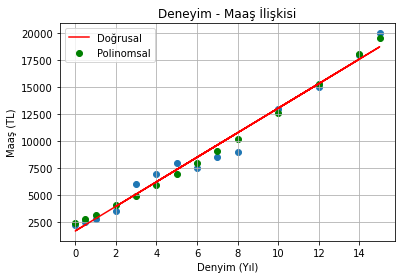

In [6]:
# Tahmin 
y_tahmin_linear = linear_reg.predict(x)
y_tahmin_poly = poly_reg.predict(x_polinom)

# Görsel
plt.scatter(df.deneyim, df.maas)
plt.plot(x, y_tahmin_linear, color = "red", label = "Doğrusal")
plt.scatter(x, y_tahmin_poly, color = "green", label = "Polinomsal")
plt.legend()
plt.ylabel("Maaş (TL)")
plt.xlabel("Denyim (Yıl)")
plt.title("Deneyim - Maaş İlişkisi")
plt.grid(True)
plt.show()

### R2 Skoru

In [7]:
# R2 Skoru
print("Doğrusal Regresyon R kare : {} ", r2_score(y, y_tahmin_linear))
print("Polinomsal Regresyon R kare : {} ", r2_score(y, y_tahmin_poly))

Doğrusal Regresyon R kare : {}  0.9775283164949902
Polinomsal Regresyon R kare : {}  0.9854449464578782
